In [1]:
!nvidia-smi

Wed Apr 13 23:53:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
np.random.seed(50)
tf.random.set_seed(50)
import os
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers

# Data Extraction and Preparation

Unziping the datasets, removing unnecessary files and rearranging them for training and testing.

In [5]:
#Mount the Google Drive for saving the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


go to the following link (CULane Dataset : https://drive.google.com/open?id=1mSLgwVTiaUMAb4AVOWwlCD5JcWdrwpvu ) and paste shortcuts of input image dataset 'driver_161_90frame.tar.gz' and output label dataset 'laneseg_label_w16.tar.gz' in your google drive in the location : gdrive/MyDrive/Lane_detection/Data/ 

In [9]:
!cd gdrive/MyDrive/Lane_detection/Data/
!ls gdrive/MyDrive/Lane_detection/Data/

CULane	Data1  driver_161_90frame.tar.gz  laneseg_label_w16.tar.gz  Out


In [ ]:
# use the below code to create the directory.
# mkdir gdrive/MyDrive/Lane_detection/Data/

Note : If you have enough space on gdrive, the data will be accumulated, if the data quota is over, it will automatically install in the virtual machine in the cloud. But in case you want to restart the runtime, those stored in VM will vanish. you may need to start from data extracting again.

Uncomment the linux commands for extracting and processing the data from the dataset.

In [ ]:
#!7z e gdrive/MyDrive/Lane_detection/Data/driver_161_90frame.tar.gz -o./gdrive/MyDrive/Lane_detection/Data/Data1

In [ ]:
#!7z x ./gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame.tar -o./gdrive/MyDrive/Lane_detection/Data/Data1


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ./gdrive/MyDrive/Lane_detection/Data/Data1/                                                     1 file, 5070054912 bytes (4836 MiB)

Extracting archive: ./gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame.tar
  2% 1024 Open              


Break signaled


In [ ]:
# Use this to unzip laneseg_label_w16.tar 
#!7z x gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16.tar -o./gdrive/MyDrive/Lane_detection/Data/Out

In [ ]:
ls ./gdrive/MyDrive/Lane_detection/Data/Data1

In [ ]:
ls ./gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame

In [7]:
!7z e gdrive/MyDrive/Lane_detection/Data/laneseg_label_w16.tar.gz -o./gdrive/MyDrive/Lane_detection/Data/Out


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 261786908 bytes (250 MiB)

Extracting archive: gdrive/MyDrive/Lane_detection/Data/laneseg_label_w16.tar.gz
--
Path = gdrive/MyDrive/Lane_detection/Data/laneseg_label_w16.tar.gz
Type = gzip
Headers Size = 10


Would you like to replace the existing file:
  Path:     ./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16.tar
  Size:     619694080 bytes (591 MiB)
  Modified: 2017-12-16 10:24:54
with the file from archive:
  Path:     laneseg_label_w16.tar
  Size:     619694080 bytes (591 MiB)
  Modified: 2017-12-16 10:24:54
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? Y

  0% - laneseg_label_w16.tar                              2% - lan

In [8]:
!7z x gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16.tar laneseg_label_w16/driver_161_90frame -o./gdrive/MyDrive/Lane_detection/Data/Out


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 619694080 bytes (591 MiB)

Extracting archive: gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16.tar
  0% 1024 Open               27% 29696 Open                51% 53248 Open                76% 77824 Open               --
Path = gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16.tar
Type = tar
Physical Size = 619694080
Headers Size = 51026432
Code Page = UTF-8

702%      0% 32         0% 64         0% 97 - laneseg_label_w16/driver_161_90frame/06040214_1044.MP4/04590.png          

In [ ]:
ls ./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16

driver_161_90frame/


In [ ]:
ls ./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/

06030819_0755.MP4/  06031213_0833.MP4/  06031825_0911.MP4/  06032329_0989.MP4/
06030822_0756.MP4/  06031216_0834.MP4/  06031828_0912.MP4/  06032332_0990.MP4/
06030825_0757.MP4/  06031219_0835.MP4/  06031831_0913.MP4/  06032335_0991.MP4/
06030828_0758.MP4/  06031222_0836.MP4/  06031834_0914.MP4/  06032338_0992.MP4/
06030831_0759.MP4/  06031225_0837.MP4/  06031837_0915.MP4/  06032341_0993.MP4/
06030834_0760.MP4/  06031228_0838.MP4/  06031840_0916.MP4/  06032344_0994.MP4/
06030837_0761.MP4/  06031231_0839.MP4/  06031843_0917.MP4/  06032347_0995.MP4/
06030840_0762.MP4/  06031234_0840.MP4/  06031846_0918.MP4/  06032350_0996.MP4/
06030843_0763.MP4/  06031237_0841.MP4/  06031849_0919.MP4/  06032353_0997.MP4/
06030846_0764.MP4/  06031240_0842.MP4/  06031852_0920.MP4/  06032356_0998.MP4/
06030849_0765.MP4/  06031243_0843.MP4/  06031855_0921.MP4/  06032359_0999.MP4/
06030852_0766.MP4/  06031246_0844.MP4/  06031858_0922.MP4/  06040002_1000.MP4/
06030855_0767.MP4/  06031249_0845.MP4/  06031901_092

In [ ]:
ls ./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/| wc -l

310


In [2]:
!find ./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/ -type f | echo "There are $(wc -l) files in the output directory"

There are 15127 files in the output directory


In [3]:
!find ./gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame -type f | echo "There are $(wc -l) files in the output directory"

There are 15127 files in the output directory


Creating a list of input images and output label images.

In [10]:
X_list = []
add_X = Path('./gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame')
parent_add_X = [x for x in add_X.iterdir() if x.is_dir()]
for item in parent_add_X:
  for image in item.iterdir():
    if image.suffix=='.txt':
      if os.path.exists(image):
        os.remove(image)
        print(str(image) + " is removed")
      else:
        print("The file does not exist")
    else:
      i=image.relative_to('./gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame')
      X_list.append(i)
X_list.sort()

Streaming output truncated to the last 5000 lines.
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06030852_0766.MP4/00270.lines.txt is removed
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06030852_0766.MP4/04680.lines.txt is removed
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06030852_0766.MP4/00180.lines.txt is removed
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06030852_0766.MP4/01710.lines.txt is removed
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06030852_0766.MP4/03060.lines.txt is removed
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06030852_0766.MP4/04950.lines.txt is removed
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06030852_0766.MP4/05130.lines.txt is removed
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06030852_0766.MP4/00090.lines.txt is removed
gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame/06040041_1013.MP4/04500.lines.txt is removed
gdri

In [11]:
print('The number of input images in the dataset: ' , len(X_list))

The number of input images in the dataset:  15127


In [12]:
Y_list = []
add_Y = Path('./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame')
parent_add_Y = [x for x in add_Y.iterdir() if x.is_dir()]
for item in parent_add_Y:
  for image in item.iterdir():
    Y_list.append(image.relative_to('./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame'))
Y_list.sort()

In [13]:
print('The number of output images in the dataset',len(Y_list))

The number of output images in the dataset 18536


We can see from the results that the input and output datasets are not equal in number. Upon further checking it was clear that some of 
the input images were missing from the dataset. So we have to discard some of the output data which does not have any input file. 

In [14]:
# Filtering out the data and updating the input and output image list 
count =0
for image in Y_list:
  if Path(image.parent/image.stem).with_suffix('.jpg') not in X_list:
    print(Path(image.parent/image.stem).with_suffix('.png'))
    full_path = './gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame'/ image
    if os.path.exists(full_path):
        os.remove(full_path)
        print(str(full_path) + " is removed")
        count+=1

    else:
        print("The file does not exist")
Y_list.sort()

Streaming output truncated to the last 5000 lines.
06031237_0841.MP4/03150.png
gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/06031237_0841.MP4/03150.png is removed
06031240_0842.MP4/00090.png
gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/06031240_0842.MP4/00090.png is removed
06031240_0842.MP4/00270.png
gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/06031240_0842.MP4/00270.png is removed
06031240_0842.MP4/01800.png
gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/06031240_0842.MP4/01800.png is removed
06031240_0842.MP4/02520.png
gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/06031240_0842.MP4/02520.png is removed
06031240_0842.MP4/02700.png
gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame/06031240_0842.MP4/02700.png is removed
06031240_0842.MP4/03420.png
gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver

In [15]:
Y_list = []
add_Y = Path('./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame')
parent_add_Y = [x for x in add_Y.iterdir() if x.is_dir()]
for item in parent_add_Y:
  for image in item.iterdir():
    Y_list.append(image.relative_to('./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame'))
len(Y_list)

15127

In [16]:
#Double checking the datalist
count = 0
for i in range(len(X_list)):
  print(X_list[i], '    ', Y_list[i])

Streaming output truncated to the last 5000 lines.
06032213_0964.MP4/04770.jpg      06040017_1005.MP4/02610.png
06032213_0964.MP4/04860.jpg      06040017_1005.MP4/04410.png
06032213_0964.MP4/04950.jpg      06040017_1005.MP4/01710.png
06032213_0964.MP4/05040.jpg      06040017_1005.MP4/02250.png
06032213_0964.MP4/05130.jpg      06040017_1005.MP4/01350.png
06032213_0964.MP4/05220.jpg      06040017_1005.MP4/00450.png
06032213_0964.MP4/05310.jpg      06040017_1005.MP4/05130.png
06032216_0965.MP4/00000.jpg      06040017_1005.MP4/04770.png
06032216_0965.MP4/00090.jpg      06040017_1005.MP4/05040.png
06032216_0965.MP4/00180.jpg      06040017_1005.MP4/00270.png
06032216_0965.MP4/00270.jpg      06040017_1005.MP4/01530.png
06032216_0965.MP4/00360.jpg      06040017_1005.MP4/00360.png
06032216_0965.MP4/00450.jpg      06040017_1005.MP4/02700.png
06032216_0965.MP4/00540.jpg      06040017_1005.MP4/03780.png
06032216_0965.MP4/00720.jpg      06040017_1005.MP4/00180.png
06032216_0965.MP4/00810.jpg      0

Even though we have 15000 image prepared from the dataset, we are using only a portion of the dataset because of the limitation in the compute resources

In [2]:
#from tensorflow.data import Dataset
img_height = 256
img_width = 512
batch_size = 32
DATASET_SIZE = 15127
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)
add_X = Path('./gdrive/MyDrive/Lane_detection/Data/Data1/driver_161_90frame')
add_Y = Path('./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame')
print('Input Image dataset : ')
train_x_ds = tf.keras.utils.image_dataset_from_directory(add_X, image_size=(img_height, img_width), validation_split=0.9, subset="training",
                                                       labels=None, shuffle = False, follow_links = True , batch_size=None,seed =50)
train_x = list(train_x_ds.as_numpy_iterator())
#val_x_ds = tf.keras.utils.image_dataset_from_directory(add_X, image_size=(img_height, img_width), validation_split=0.2, subset="validation",
#                                                       labels=None, shuffle = False, follow_links = True,seed =50)
print('\nOutput label dataset :')
train_y_ds = tf.keras.utils.image_dataset_from_directory(add_Y, image_size=(img_height, img_width), batch_size=None, validation_split=0.9, subset="training",
                                                       labels=None, shuffle = False, follow_links = True,seed =50)
train_y = list(train_y_ds.as_numpy_iterator())

#Spliting the dataset into training and testing datas
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, train_size=0.9,shuffle = True,random_state=50)

Input Image dataset : 
Found 15127 files belonging to 1 classes.
Using 1513 files for training.

Output label dataset :
Found 15127 files belonging to 1 classes.
Using 1513 files for training.


Further Dataprocessing : Rescaling and Clipping the data values that acts a binary thresholding for the output labels.

In [3]:
train_x = np.array(train_x)
train_y = np.array(train_y)
train_x = layers.Rescaling(1.0/255)(train_x)
train_x = train_x.numpy()
 
#Output labels are already in PNG format, so no need to rescale it to 0 to 1.
#But as we are considering binary class, ie. Class 0 for non-lane pixel and Class 1 foor lane pixel, we need to do binary thresholding byusing clip_by_value function.
train_y = tf.clip_by_value(train_y, clip_value_min=0, clip_value_max=1)
train_y = train_y.numpy()

test_x = np.array(test_x)
test_y = np.array(test_y)
test_x = layers.Rescaling(1.0/255)(test_x)
test_x = test_x.numpy()
test_y = tf.clip_by_value(test_y, clip_value_min=0, clip_value_max=1)
test_y = test_y.numpy()

In [ ]:
train_x.shape

(1361, 256, 512, 3)

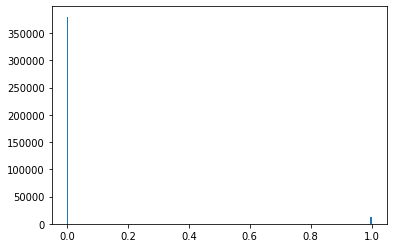

In [19]:
#To show that the output image is in binary format with pixel 1 being signified as the lane markings.
plt.hist(train_y[200].ravel(),bins = 256)
plt.show()

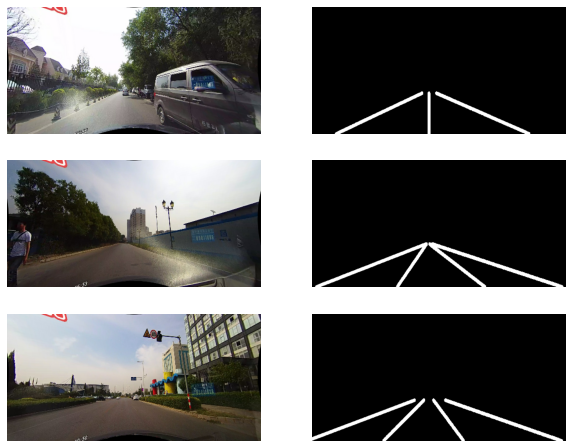

In [20]:
# Displaying Input and Output Images before Model fitting
plt.figure(figsize=(10, 8))
test_list=np.random.randint(1000,size=3)
i=1;
for t in test_list:
  ax = plt.subplot(len(test_list), 2, i)
  plt.imshow(train_x[t])
  plt.axis("off")
  i+=1
  ax = plt.subplot(len(test_list), 2, i)
  plt.imshow(train_y[t])
  plt.axis("off")
  i+=1

In [ ]:
#AUTOTUNE = tf.data.AUTOTUNE

#train_x = train_x.cache().prefetch(buffer_size=AUTOTUNE)
#train_y = train_y.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model 1 Compilation and Model Training

In [21]:
#Model with 3 Layers each in Encoder-Decoder block
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, (3,3),strides=(2,2), activation=layers.LeakyReLU(alpha=0.01) ,input_shape = train_x[0].shape,padding='same'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3,3),strides=(2,2), activation='relu',padding='same'),
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(256, (3,3),strides=(2,2), activation='relu'),
  #tf.keras.layers.Conv2D(256, (3,3),strides=(2,2), activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3),strides=(2,2), activation='relu',padding = 'same'),
  #tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.5),
  #tf.keras.layers.Dense(128, activation=layers.LeakyReLU(alpha=0.01)),
  #tf.keras.layers.Dropout(0.5),
  #tf.keras.layers.Dense(128, activation=layers.LeakyReLU(alpha=0.01)),
  #tf.keras.layers.Dropout(0.3),
  #tf.keras.layers.Dropout(0.5),
  #tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dense(56, activation='relu'),
  #tf.keras.layers.Dense(1024, activation='relu'),
  ####tf.keras.layers.Dropout(0.3)
  tf.keras.layers.Conv2DTranspose(256, (3,3),strides=(2,2), activation='relu',padding = 'same'),
  #tf.keras.layers.Conv2DTranspose(256, (3,3),strides=(2,2), activation='relu'),
  #tf.keras.layers.Conv2DTranspose(256, (3,3),strides=(1,1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  ###tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2DTranspose(128, (3,3),strides=(2,2), activation='relu',padding='same'),
  tf.keras.layers.BatchNormalization(),
  ####tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2DTranspose(64, (3,3),strides=(2,2), activation=layers.LeakyReLU(alpha=0.01),padding='same'),
  #tf.keras.layers.BatchNormalization(),
  ####tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2DTranspose(3, (3,3), activation='relu',padding='same'),
  tf.keras.layers.Conv2DTranspose(3, (3,3),strides=(1,1), activation='tanh',padding='same'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              #loss = ['mae','binary_crossentropy'],
              #metrics=['accuracy'])
              metrics=[tf.keras.metrics.BinaryCrossentropy(),'mae'])
                       #[tf.keras.metrics.MeanIoU(2, name=None, dtype=None),'mae'])
model.summary()
history = model.fit(train_x,train_y,epochs=45,verbose='auto',validation_split=0.1,callbacks=[early_stop],batch_size=32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 256, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 256, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 128, 128)      73856     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 128, 128)     512       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 64, 256)       295168    
                                                                 
 conv2d_transpose (Conv2DTra  (None, 64, 128, 256)     5

# Model 1 Evaluation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


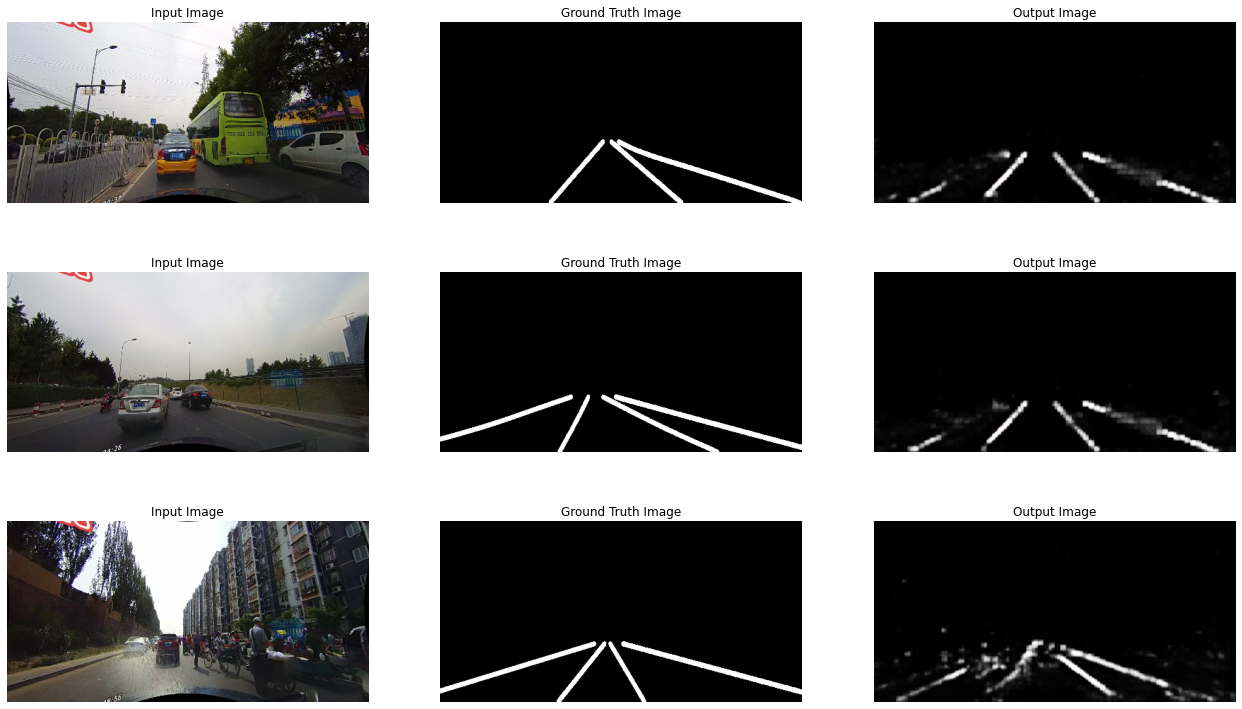

In [40]:
#Model with 3 Layers each in Encoder-Decoder block
test_list = [10,80,125]
output = model.predict(test_x[test_list])
plt.figure(figsize=(22, 13))

i=1;
for t in test_list:
  ax = plt.subplot(len(test_list), 3, i)
  plt.imshow(train_x[t])
  plt.axis("off")
  plt.title('Input Image')
  i+=1
  ax = plt.subplot(len(test_list), 3, i)
  plt.imshow(train_y[t])
  plt.axis("off")
  plt.title('Ground Truth Image')
  i+=1
  ax = plt.subplot(len(test_list), 3, i)
  plt.imshow(output[int(i/3)-1])
  plt.axis("off")
  plt.title('Output Image')
  i+=1



Model Evaluation through test dataset

In [25]:
#Model with 3 Layers each in Encoder-Decoder block
results = model.evaluate(test_x, test_y,)
print("test loss, test acc:", results)
m = tf.keras.metrics.MeanIoU(num_classes=2)
m.update_state(test_x, test_y)
print('Mean of Intersction of Union Metric: ')
m.result().numpy()

5/5 [==============================] - 1s 169ms/step - loss: 0.0729 - binary_crossentropy: 0.0729 - mae: 0.2150
test loss, test acc: [0.072921022772789, 0.072921022772789, 0.21495455503463745]
Mean of Intersction of Union Metric: 


0.43466157

Model with 3 layers each in Encoder-Decorder block


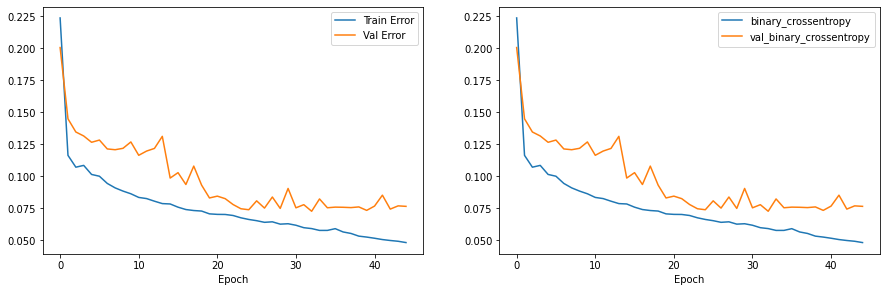

In [26]:
from IPython.core.pylabtools import figsize
# model with 3 layers of encoder-decoder 
hist = pd.DataFrame(history.history)
def plot_history():
    plt.figure(1,figsize=(15,10),)
    print('Model with 3 layers each in Encoder-Decorder block')
    plt.subplot(2,2,1)
    plt.xlabel('Epoch')
    hist["epoch"] = history.epoch
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    plt.legend()
    plt.subplot(2,2,2)
    plt.xlabel('Epoch')
    plt.plot(hist['epoch'], hist['binary_crossentropy'], label='binary_crossentropy')
    plt.plot(hist['epoch'], hist['val_binary_crossentropy'], label='val_binary_crossentropy')
    plt.legend()

plot_history()

#  Model 2 Compilation and Model Training

In [4]:

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, (3,3),strides=(2,2), activation=layers.LeakyReLU(alpha=0.01) ,input_shape = train_x[0].shape,padding='same'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3,3),strides=(2,2), activation='relu',padding='same'),
  #tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(256, (3,3),strides=(2,2), activation='relu'),
  #tf.keras.layers.Conv2D(256, (3,3),strides=(2,2), activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3),strides=(2,2), activation='relu',padding = 'same'),
  tf.keras.layers.Dense(256, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  #tf.keras.layers.Dense(128, activation=layers.LeakyReLU(alpha=0.01)),
  #tf.keras.layers.Dropout(0.5),
  #tf.keras.layers.Dense(128, activation=layers.LeakyReLU(alpha=0.01)),
  #tf.keras.layers.Dropout(0.3),
  #tf.keras.layers.Dropout(0.5),
  #tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dense(56, activation='relu'),
  #tf.keras.layers.Dense(1024, activation='relu'),
  ####tf.keras.layers.Dropout(0.3)
  tf.keras.layers.Conv2DTranspose(256, (3,3),strides=(2,2), activation='relu',padding = 'same'),
  #tf.keras.layers.Conv2DTranspose(256, (3,3),strides=(2,2), activation='relu'),
  #tf.keras.layers.Conv2DTranspose(256, (3,3),strides=(1,1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  ###tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2DTranspose(128, (3,3),strides=(2,2), activation='relu',padding='same'),
  tf.keras.layers.BatchNormalization(),
  ####tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2DTranspose(64, (3,3),strides=(2,2), activation=layers.LeakyReLU(alpha=0.01),padding='same'),
  #tf.keras.layers.BatchNormalization(),
  ####tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2DTranspose(3, (3,3), activation='relu',padding='same'),
  tf.keras.layers.Conv2DTranspose(3, (3,3),strides=(1,1), activation='tanh',padding='same'),
])
model.compile(optimizer='adam',
              #optimizer='sgd',
              loss='binary_crossentropy',
              #loss = ['mae','binary_crossentropy'],
              #metrics=['accuracy'])
              metrics=[tf.keras.metrics.BinaryCrossentropy(),'mae'])
                       #[tf.keras.metrics.MeanIoU(2, name=None, dtype=None),'mae'])
model.summary()
history = model.fit(train_x,train_y,epochs=1000,verbose='auto',validation_split=0.1,callbacks=[early_stop],batch_size=32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 256, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 256, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 128, 128)      73856     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 128, 128)     512       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 64, 256)       295168    
                                                                 
 dense (Dense)               (None, 32, 64, 256)       6

Model with 3 layers each in Encoder-Decorder block with Bottleneck layer(3 dense layer)


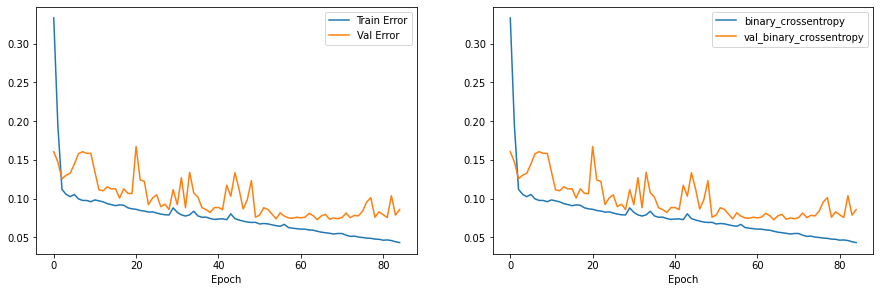

In [5]:
from IPython.core.pylabtools import figsize
# model with 3 layers of encoder-decoder with bottleneck layer to further squeeze the data
hist = pd.DataFrame(history.history)
def plot_history():
    plt.figure(1,figsize=(15,10),)
    print('Model with 3 layers each in Encoder-Decorder block with Bottleneck layer(3 dense layer)')
    plt.subplot(2,2,1)
    plt.xlabel('Epoch')
    #plt.ylabel('MSE')
    hist["epoch"] = history.epoch
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    plt.legend()
    plt.subplot(2,2,2)
    plt.xlabel('Epoch')
    #plt.ylabel('MSE')
    plt.plot(hist['epoch'], hist['binary_crossentropy'], label='binary_crossentropy')
    plt.plot(hist['epoch'], hist['val_binary_crossentropy'], label='val_binary_crossentropy')
    plt.legend()

plot_history()

# Model 2 Evaluation

In [7]:
results = model.evaluate(test_x, test_y,)
print("test loss, test acc:", results)
m = tf.keras.metrics.MeanIoU(num_classes=2)
m.update_state(test_x, test_y)
print('Mean of Intersction of Union Metric: ')
m.result().numpy()

5/5 [==============================] - 2s 400ms/step - loss: 0.0815 - binary_crossentropy: 0.0815 - mae: 0.2709
test loss, test acc: [0.08154348284006119, 0.08154348284006119, 0.27091920375823975]
Mean of Intersction of Union Metric: 


0.43466157

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


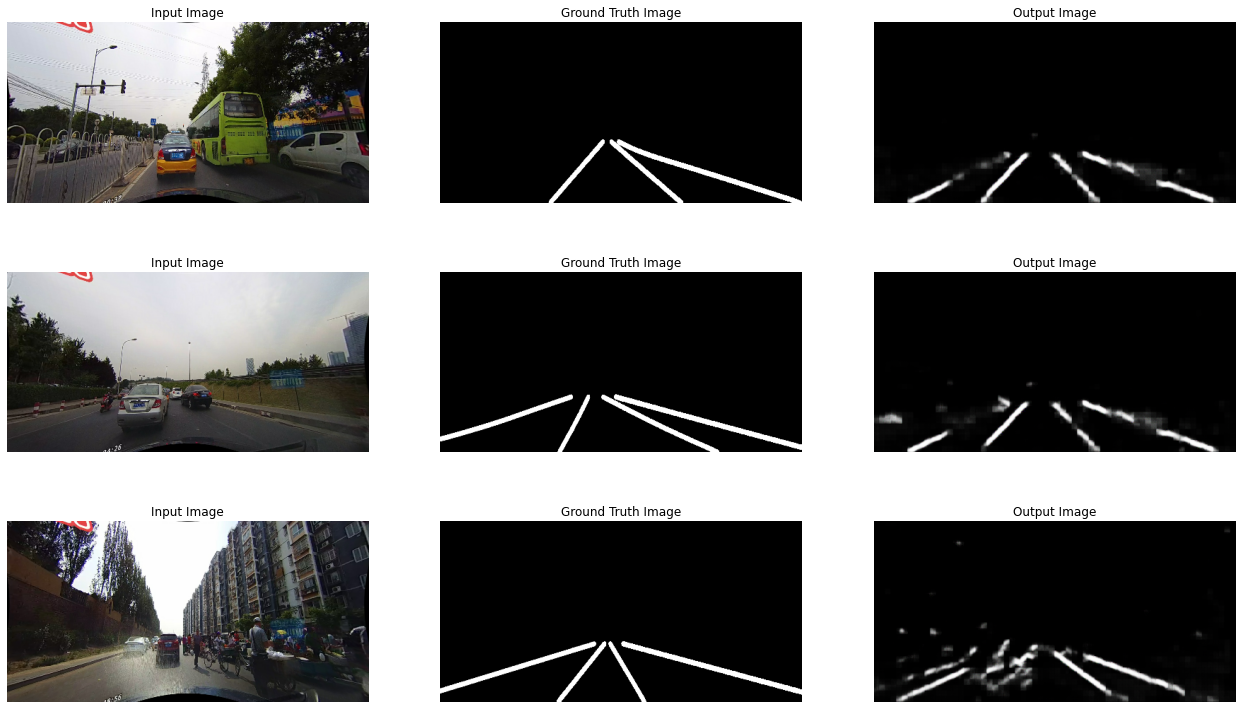

In [6]:
#Model with 3 layers each in Encoder-Decorder block with Bottleneck layer(3 dense layer)
test_list = [10,80,125]
output = model.predict(test_x[test_list])
plt.figure(figsize=(22, 13))

i=1;
for t in test_list:
  ax = plt.subplot(len(test_list), 3, i)
  plt.imshow(train_x[t])
  plt.axis("off")
  plt.title('Input Image')
  i+=1
  ax = plt.subplot(len(test_list), 3, i)
  plt.imshow(train_y[t])
  plt.axis("off")
  plt.title('Ground Truth Image')
  i+=1
  ax = plt.subplot(len(test_list), 3, i)
  plt.imshow(output[int(i/3)-1])
  plt.axis("off")
  plt.title('Output Image')
  i+=1

Uncomment the lines and run the piece of the code to remove all the unzipped data

In [ ]:
#rm -r ./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_23_30frame
#rm -r ./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_182_30frame
#rm -r ./gdrive/MyDrive/Lane_detection/Data/Out/laneseg_label_w16/driver_161_90frame
#rm -r ./gdrive/MyDrive/Lane_detection/Data/Data1